In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Load dataset
import os
if not os.path.exists('E:/Internship/DA Intern/Task5/dataset/train.csv'):
    print("train.csv not found in current directory.\nPlease download from Kaggle and place it here. See README for instructions.")
else:
    df = pd.read_csv('E:/Internship/DA Intern/Task5/dataset/train.csv')
    print('Loaded train.csv — shape:', df.shape)
    df.head()

Loaded train.csv — shape: (891, 12)


In [4]:
#`.info()` and `.describe()` to inspect data types, nulls, and summary statistics.
try:
    display(df.info())
    display(df.describe(include='all'))
except NameError:
    print('Dataframe `df` not loaded. Run the previous cell after placing train.csv in the working directory.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
## 2. Missing Values & Cleaning
try:
    df.isnull().sum()
except NameError:
    print('Dataframe `df` not loaded.')

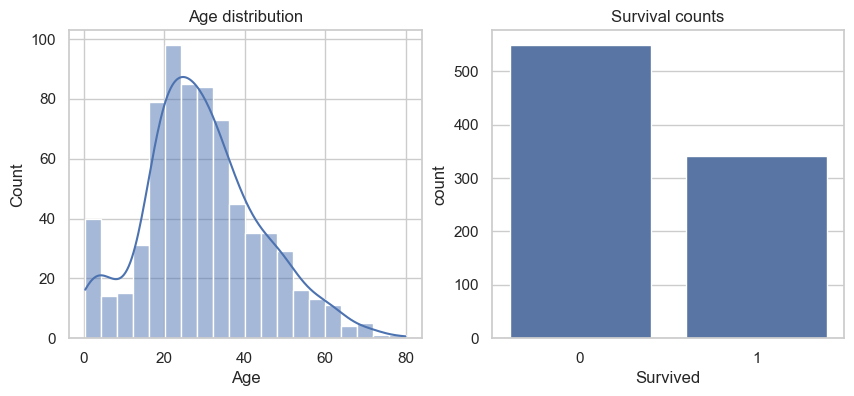

In [6]:
## 3. Univariate Analysis
try:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df['Age'].dropna(), kde=True)
    plt.title('Age distribution')
    plt.subplot(1,2,2)
    sns.countplot(x='Survived', data=df)
    plt.title('Survival counts')
    plt.show()
except Exception as e:
    print('Could not plot — make sure df is loaded and matplotlib inline is enabled.', e)

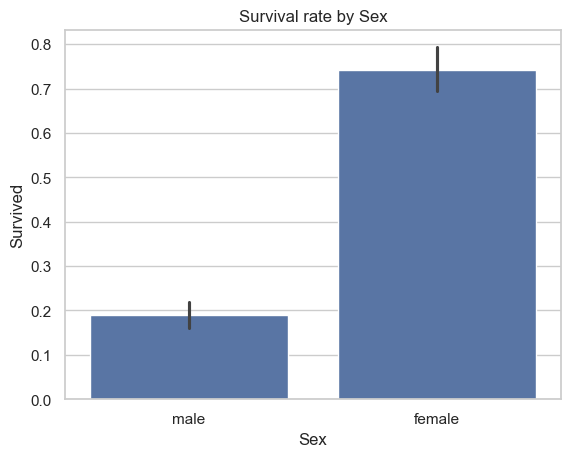

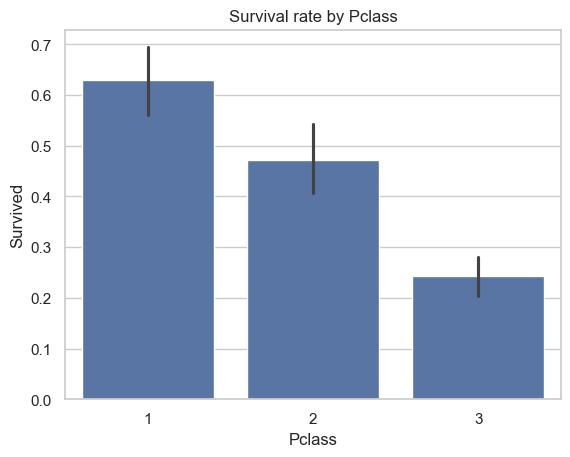

In [7]:
## 4. Bivariate Analysis
try:
    sns.barplot(x='Sex', y='Survived', data=df)
    plt.title('Survival rate by Sex')
    plt.show()
    sns.barplot(x='Pclass', y='Survived', data=df)
    plt.title('Survival rate by Pclass')
    plt.show()
except Exception as e:
    print('Could not plot —', e)

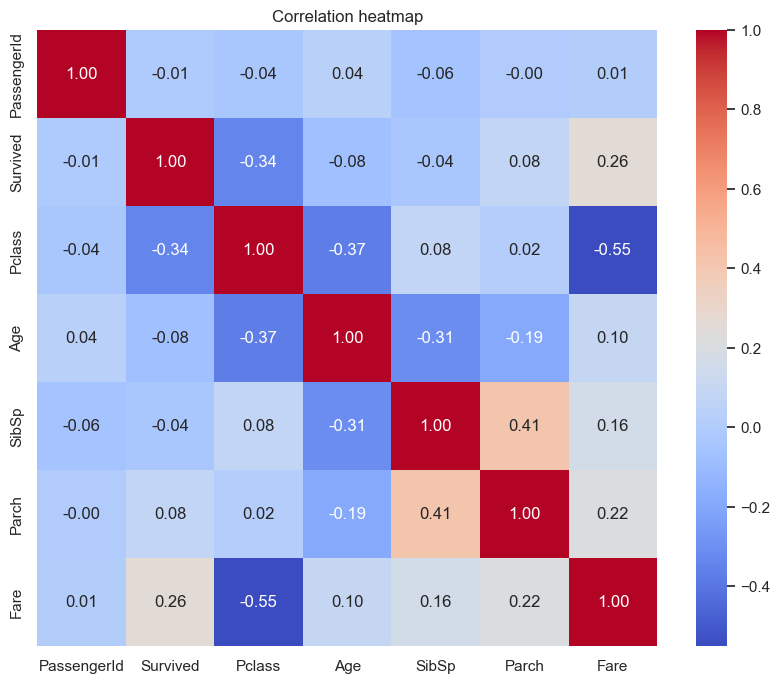

In [8]:
## 5. Multivariate Analysis
try:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(10,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation heatmap')
    plt.show()
except Exception as e:
    print('Could not compute heatmap —', e)

In [11]:
# 6. Feature Engineering Ideas
#Extract Title from Name, create FamilySize, IsAlone, fill Age by group medians.
try:
    df['Title'] = df['Name'].str.extract(',/s*([^/.]+)/.', expand=False)
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize']==1).astype(int)
    display(df[['Name','Title','FamilySize','IsAlone']].head())
except Exception as e:
    print('Could not create features —', e)

,Name,Title,FamilySize,IsAlone
0,"Braund, Mr. Owen Harris",NaN,2,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,2,0
2,"Heikkinen, Miss. Laina",NaN,1,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,2,0
4,"Allen, Mr. William Henry",NaN,1,1
